In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
traindata=pd.read_csv("D:\\train.csv")
testdata =pd.read_csv("D:\\test.csv")
sample_submission=pd.read_csv('D:\\sample_submission.csv')

In [2]:
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Analysis

In [4]:
traindata.shape

(1458, 81)

In [5]:
testdata.shape

(1459, 80)

In [6]:
traindata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,...,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,56.947874,70.047540,10517.774348,6.100823,5.574760,1971.286694,1984.871742,103.828276,443.645405,...,93.61797,46.677641,21.907407,3.414266,15.081619,2.762689,43.548697,6.323731,2007.814129,180970.727709
std,421.032659,42.307483,24.304521,9988.079567,1.383345,1.113452,30.218038,20.650954,181.150114,456.181627,...,124.08718,66.287857,61.112847,29.337173,55.792877,40.204743,496.460799,2.704783,1.327764,79485.673532
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,729.500000,50.000000,69.000000,9475.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1093.750000,70.000000,80.000000,11604.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,...,168.00000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1458.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.00000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
testdata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
traindata.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
testdata.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

# MSSubClass

### column description
#####  Identifies the type of dwelling involved in the sale

In [10]:
traindata["MSSubClass"].isnull().sum()

0

In [11]:
testdata["MSSubClass"].isnull().sum()

0

In [12]:
traindata["MSSubClass"].value_counts()

20     534
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

(array([603., 160., 359.,  94.,  52.,  87.,   0.,   0.,  63.,  40.]),
 array([ 20.,  37.,  54.,  71.,  88., 105., 122., 139., 156., 173., 190.]),
 <BarContainer object of 10 artists>)

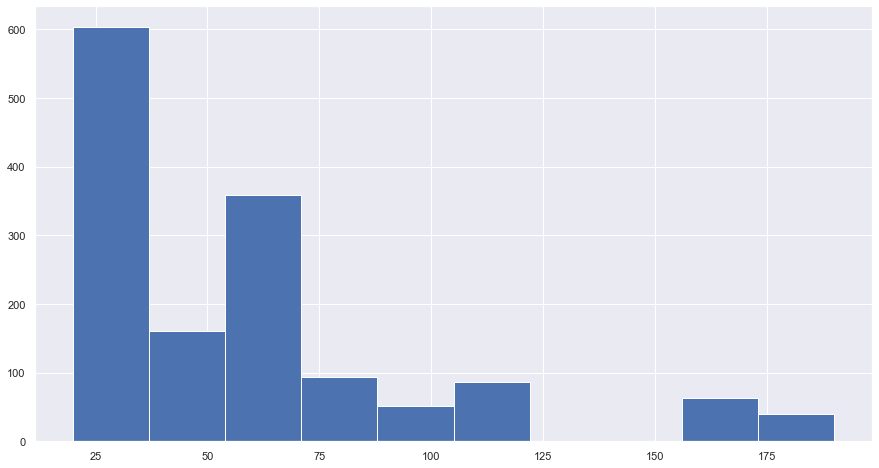

In [13]:
sns.set(rc={'figure.figsize':(15,8)})
plt.hist("MSSubClass",data=traindata)


# MSZoning

### Identifies the general zoning classification of the sale.

In [14]:
traindata["MSZoning"].isnull().sum()

0

In [15]:
testdata["MSZoning"].isnull().sum()

4

In [16]:
testdata["MSZoning"]=testdata["MSZoning"].fillna(testdata["MSZoning"]).mode()[0]

In [17]:
testdata["MSZoning"].isnull().sum()

0

In [18]:
traindata["MSZoning"].value_counts()

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

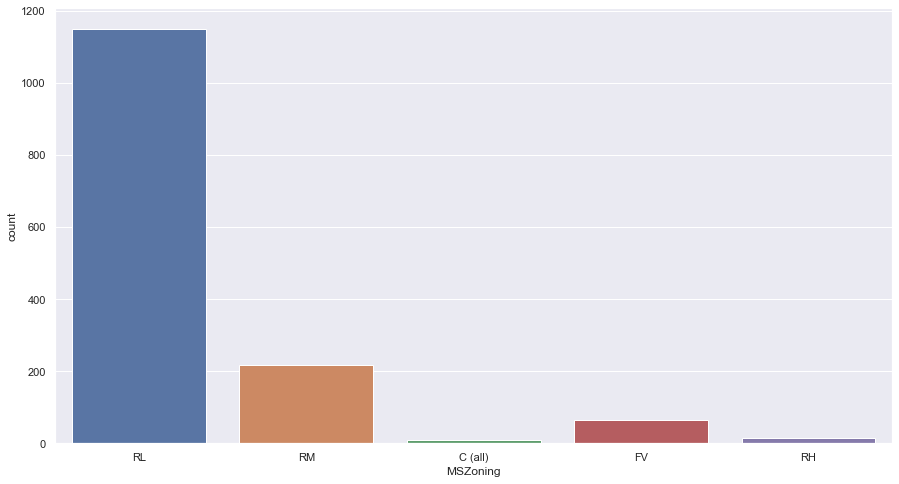

In [19]:
sns.countplot("MSZoning",data=traindata)

# LotFrontage: 
#### Linear feet of street connected to property

In [20]:
traindata["LotFrontage"].isnull().sum()

259

In [21]:
testdata["LotFrontage"].isnull().sum()

227

In [22]:
traindata["LotFrontage"]=traindata["LotFrontage"].fillna(traindata["LotFrontage"]).mean()

In [23]:
testdata["LotFrontage"]=testdata["LotFrontage"].fillna(testdata["LotFrontage"]).mean()


In [24]:
traindata["LotFrontage"].value_counts()

70.04754    1458
Name: LotFrontage, dtype: int64

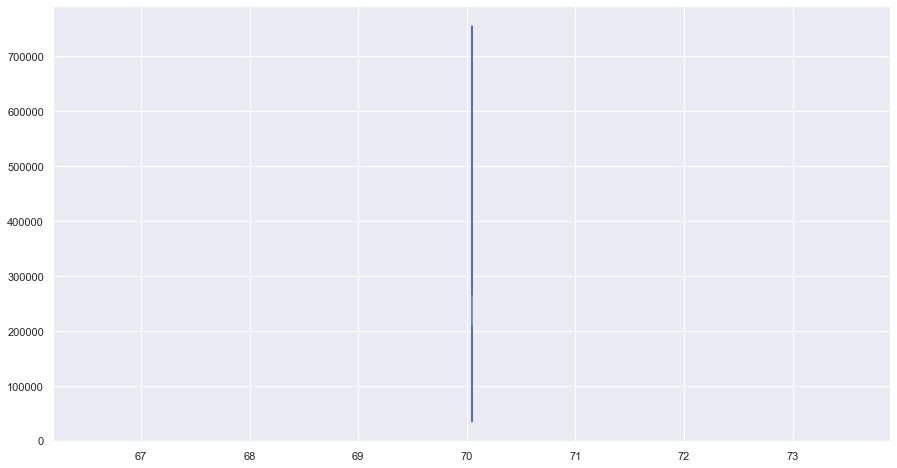

In [25]:
plt.plot("LotFrontage","SalePrice",data=traindata)

# LotArea:
#### Lot size in square feet

In [26]:
traindata["LotArea"].isnull().sum()

0

In [27]:
testdata["LotFrontage"].isnull().sum()

0

In [28]:
testdata["LotArea"].value_counts()

9600     20
7200     18
6000     17
9000     15
7500     12
         ..
12304     1
8232      1
2448      1
9024      1
10441     1
Name: LotArea, Length: 1106, dtype: int64

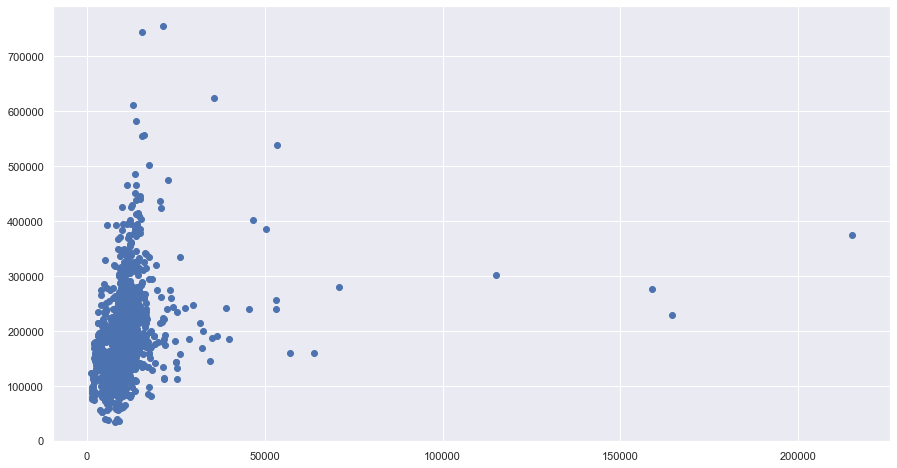

In [29]:
plt.scatter("LotArea","SalePrice",data=traindata)

# Street: 
#### Type of road access to property

In [30]:
traindata["Street"].isnull().sum()

0

In [31]:
testdata["Street"].isnull().sum()

0

In [32]:
traindata["Street"].value_counts()

Pave    1452
Grvl       6
Name: Street, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Street', ylabel='count'>

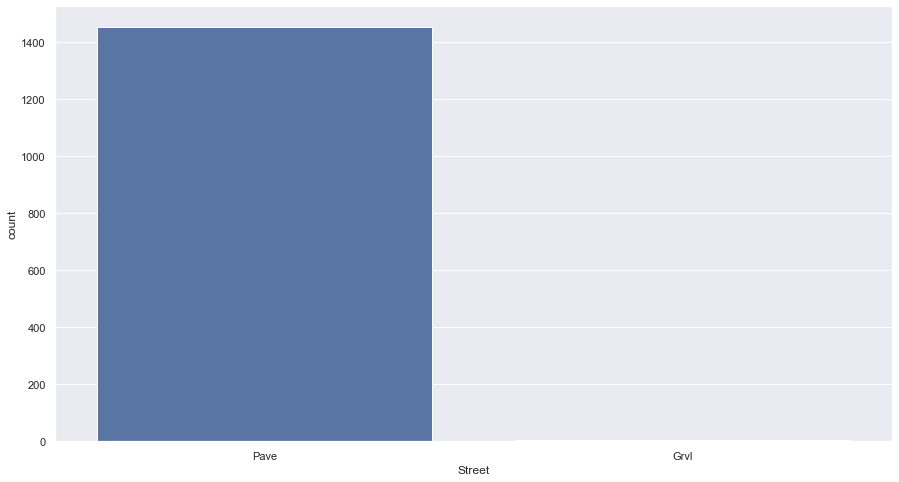

In [33]:
sns.countplot("Street",data=traindata)

# Alley:
#### Type of alley access to property

In [34]:
traindata["Alley"].isnull().sum()

1367

In [35]:
testdata["Alley"].isnull().sum()

1352

### This column not important because most values are null

In [36]:
#traindata.drop(['Alley'], axis=1, inplace=True)
#testdata.drop(['Alley'], axis=1, inplace=True)

# LotShape:
#### General shape of property

In [37]:
traindata["LotShape"].isnull().sum()

0

In [38]:
testdata["LotShape"].isnull().sum()

0

In [39]:
traindata["LotShape"].value_counts()

Reg    923
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotShape', ylabel='count'>

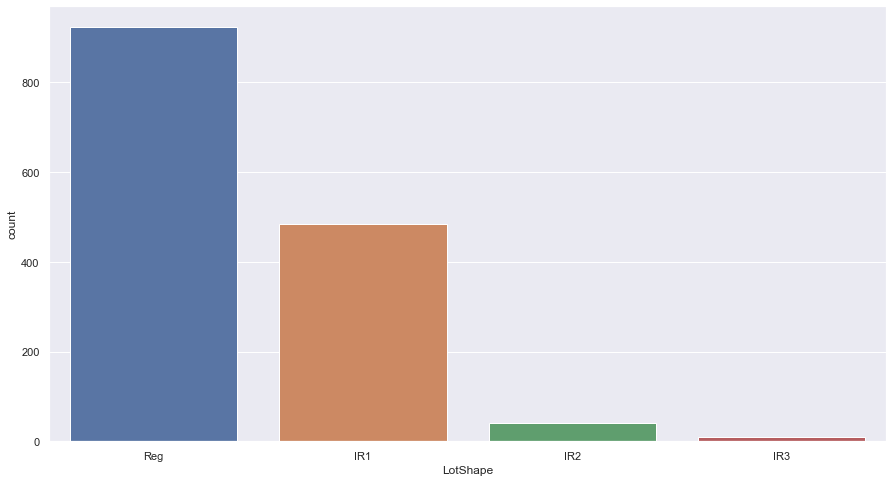

In [40]:
sns.countplot("LotShape",data=traindata)

# LandContour: 
#### Flatness of the property

In [41]:
traindata["LandContour"].isnull().sum()

0

In [42]:
testdata["LandContour"].isnull().sum()

0

In [43]:
traindata["LandContour"].value_counts()

Lvl    1309
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LandContour', ylabel='count'>

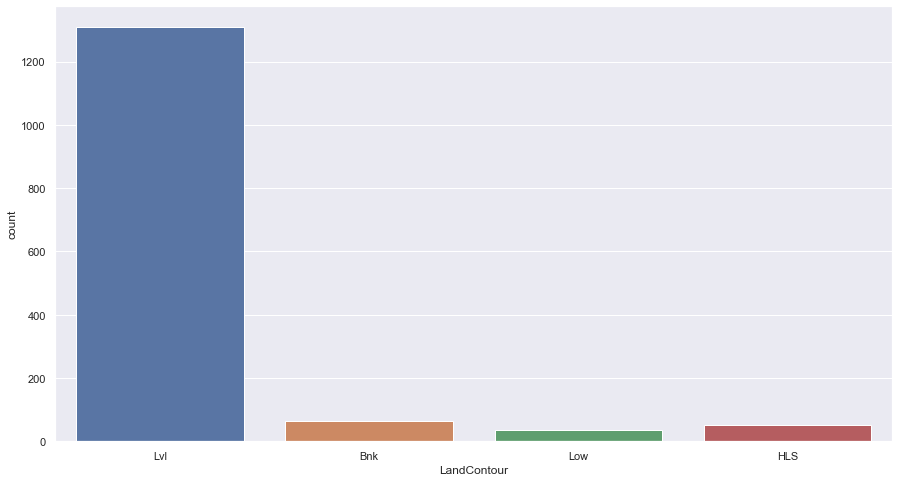

In [44]:
sns.countplot("LandContour",data=traindata)

# Utilities:
#### Type of utilities available

In [45]:
traindata["Utilities"].isnull().sum()

0

In [46]:
testdata["Utilities"].isnull().sum()


2

In [47]:
testdata["Utilities"]=testdata["Utilities"].fillna(testdata["Utilities"]).mode()[0]

In [48]:
traindata["Utilities"].value_counts()

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

#### This column not important because all values are ALLpub

In [49]:
# traindata.drop(['Utilities'], axis=1, inplace=True)
# testdata.drop(['Utilities'], axis=1, inplace=True)

# LandSlope:
#### Slope of property

In [50]:
traindata["LandSlope"].value_counts()

Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LandSlope', ylabel='count'>

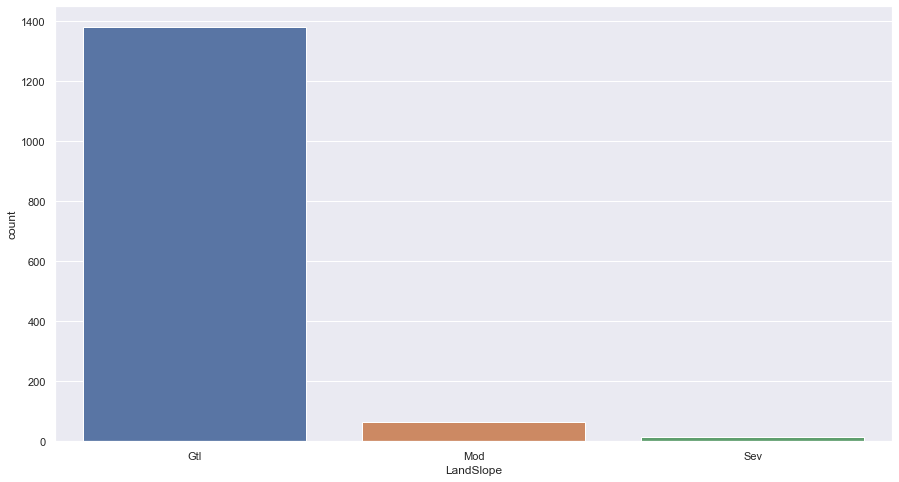

In [51]:
sns.countplot("LandSlope",data=traindata)

# Neighborhood:
#### Physical locations within Ames city limits

In [52]:
traindata["Neighborhood"].isnull().sum()

0

In [53]:
testdata["Neighborhood"].isnull().sum()

0

In [54]:
traindata["Neighborhood"].value_counts()

NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

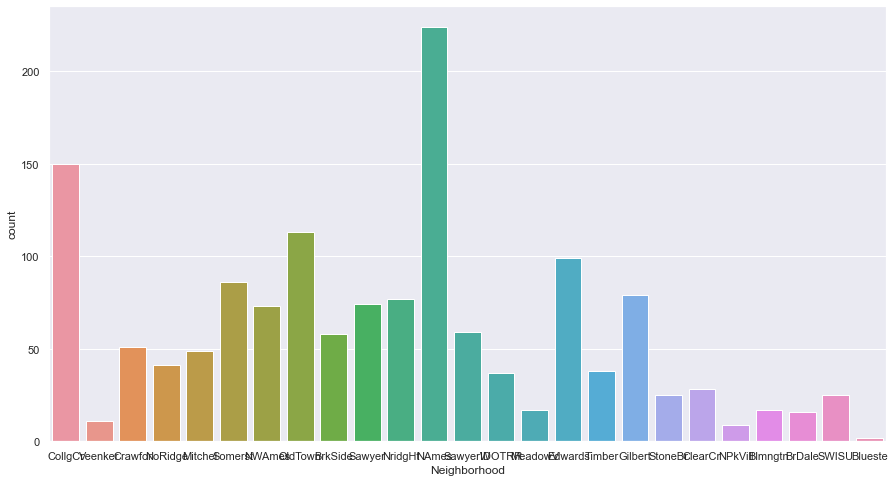

In [55]:
sns.countplot('Neighborhood',data=traindata)

# Condition1:
#### Proximity to various conditions

In [56]:
testdata["Condition1"].isnull().sum()

0

In [57]:
traindata["Condition1"].value_counts()

Norm      1258
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition1', ylabel='count'>

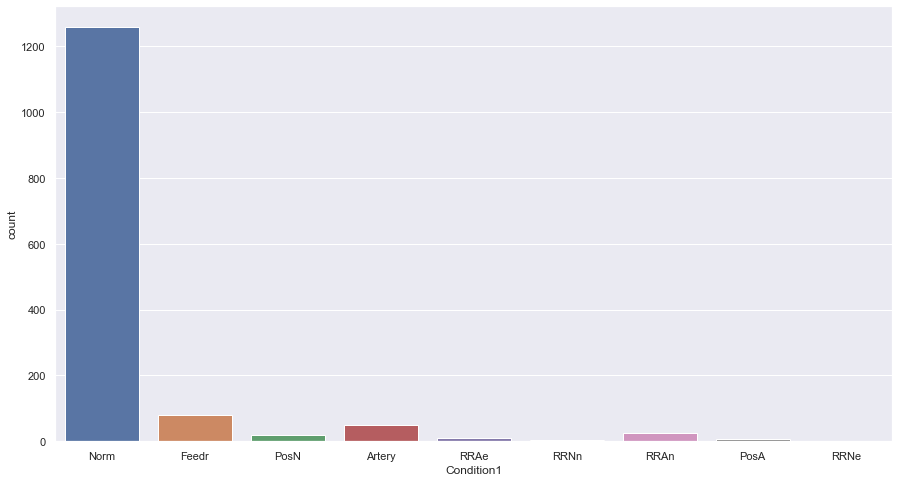

In [58]:
sns.countplot("Condition1",data=traindata)


# Condition2:
#### Proximity to various conditions (if more than one is present)

In [59]:
traindata["Condition2"].value_counts()

Norm      1443
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition2', ylabel='count'>

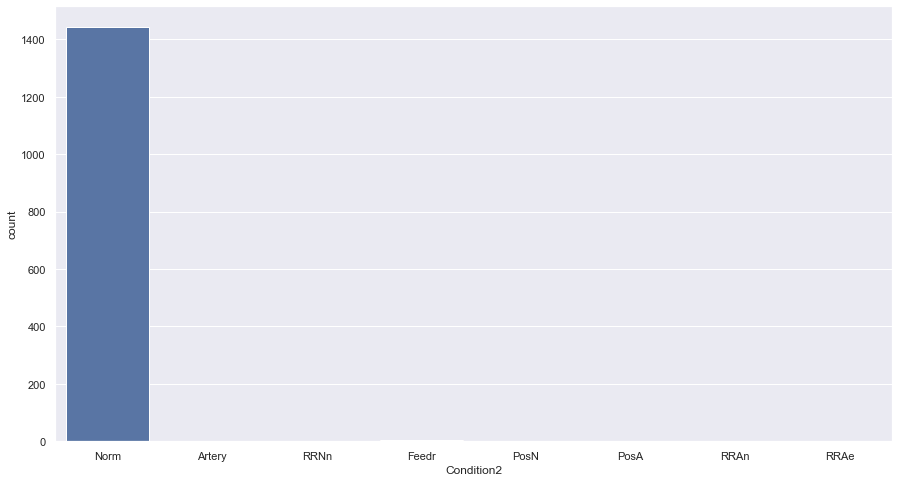

In [60]:
sns.countplot("Condition2",data=traindata)

# BldgType: 
#### Type of dwelling

In [61]:
traindata["BldgType"].isnull().sum()

0

In [62]:
testdata["BldgType"].isnull().sum()

0

In [63]:
traindata["BldgType"].value_counts()

1Fam      1218
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BldgType', ylabel='count'>

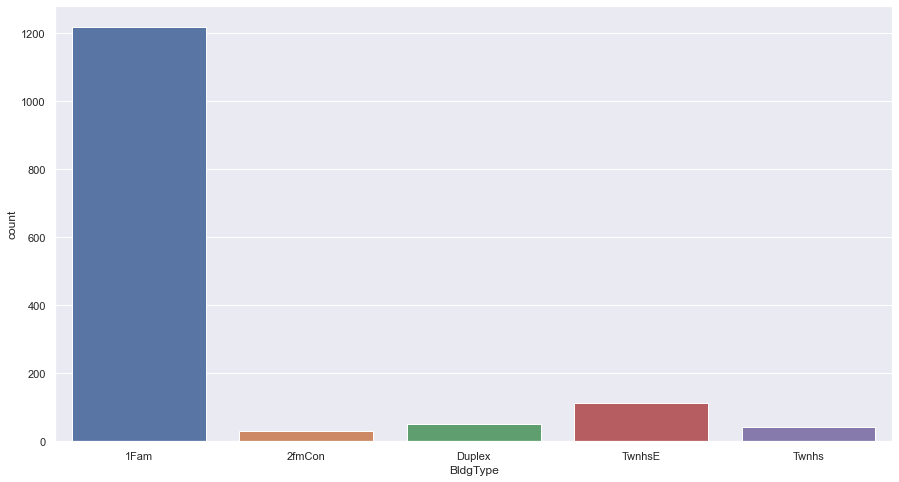

In [64]:
sns.countplot("BldgType",data=traindata)

# OverallQual:
#### Rates the overall material and finish of the house

In [65]:
traindata["OverallQual"].isnull().sum()

0

In [66]:
testdata["OverallQual"].isnull().sum()

0

In [67]:
traindata["OverallQual"].value_counts()

5     395
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

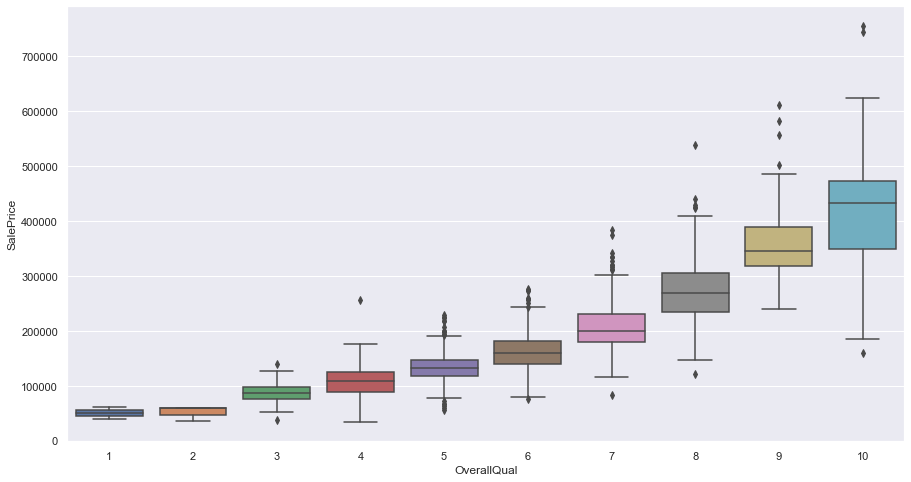

In [68]:
sns.boxplot(x="OverallQual",y="SalePrice",data=traindata)

# OverallCond:
#### Rates the overall condition of the house

In [69]:
traindata["OverallCond"].isnull().sum()

0

In [70]:
testdata["OverallCond"].isnull().sum()

0

In [71]:
traindata["OverallCond"].value_counts()

5    821
6    250
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

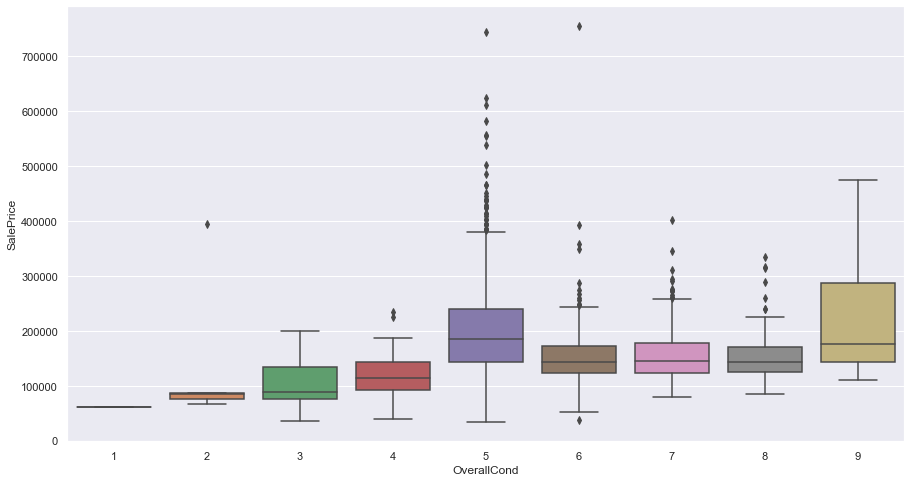

In [72]:
sns.boxplot(x="OverallCond",y="SalePrice",data=traindata)

# YearBuilt:
#### Original construction date

In [73]:
traindata["YearBuilt"].isnull().sum()

0

In [74]:
testdata["YearBuilt"].isnull().sum()

0

In [75]:
traindata["YearBuilt"].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

<BarContainer object of 1458 artists>

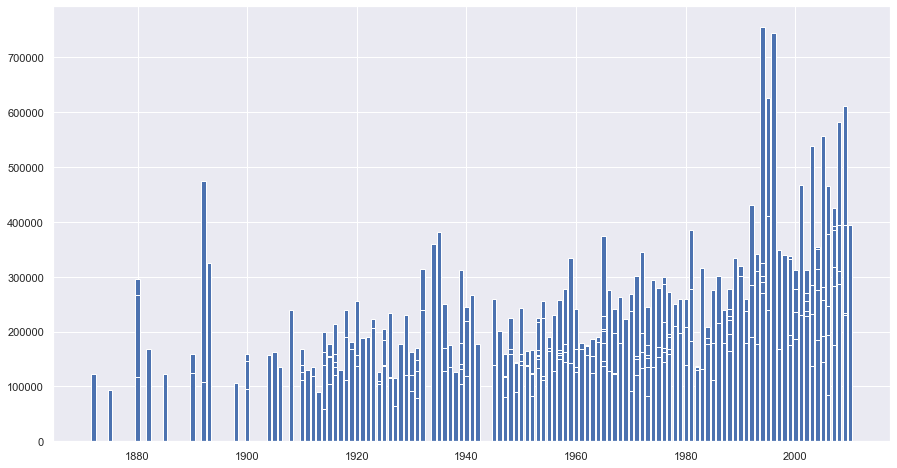

In [76]:
plt.bar('YearBuilt',"SalePrice",data=traindata)

# YearRemodAdd: 
#### Remodel date (same as construction date if no remodeling or additions)

In [77]:
traindata["YearRemodAdd"].isnull().sum()

0

In [78]:
testdata["YearRemodAdd"].isnull().sum()

0

In [79]:
traindata["YearRemodAdd"].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

<BarContainer object of 1458 artists>

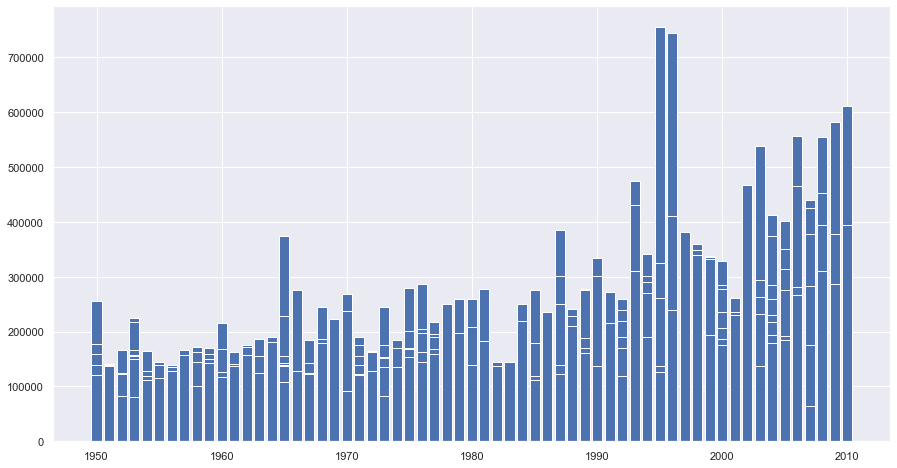

In [80]:
plt.bar('YearRemodAdd',"SalePrice",data=traindata)

## Plot all remaining categorical columns vs saleprice

In [81]:
categorical_columns=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

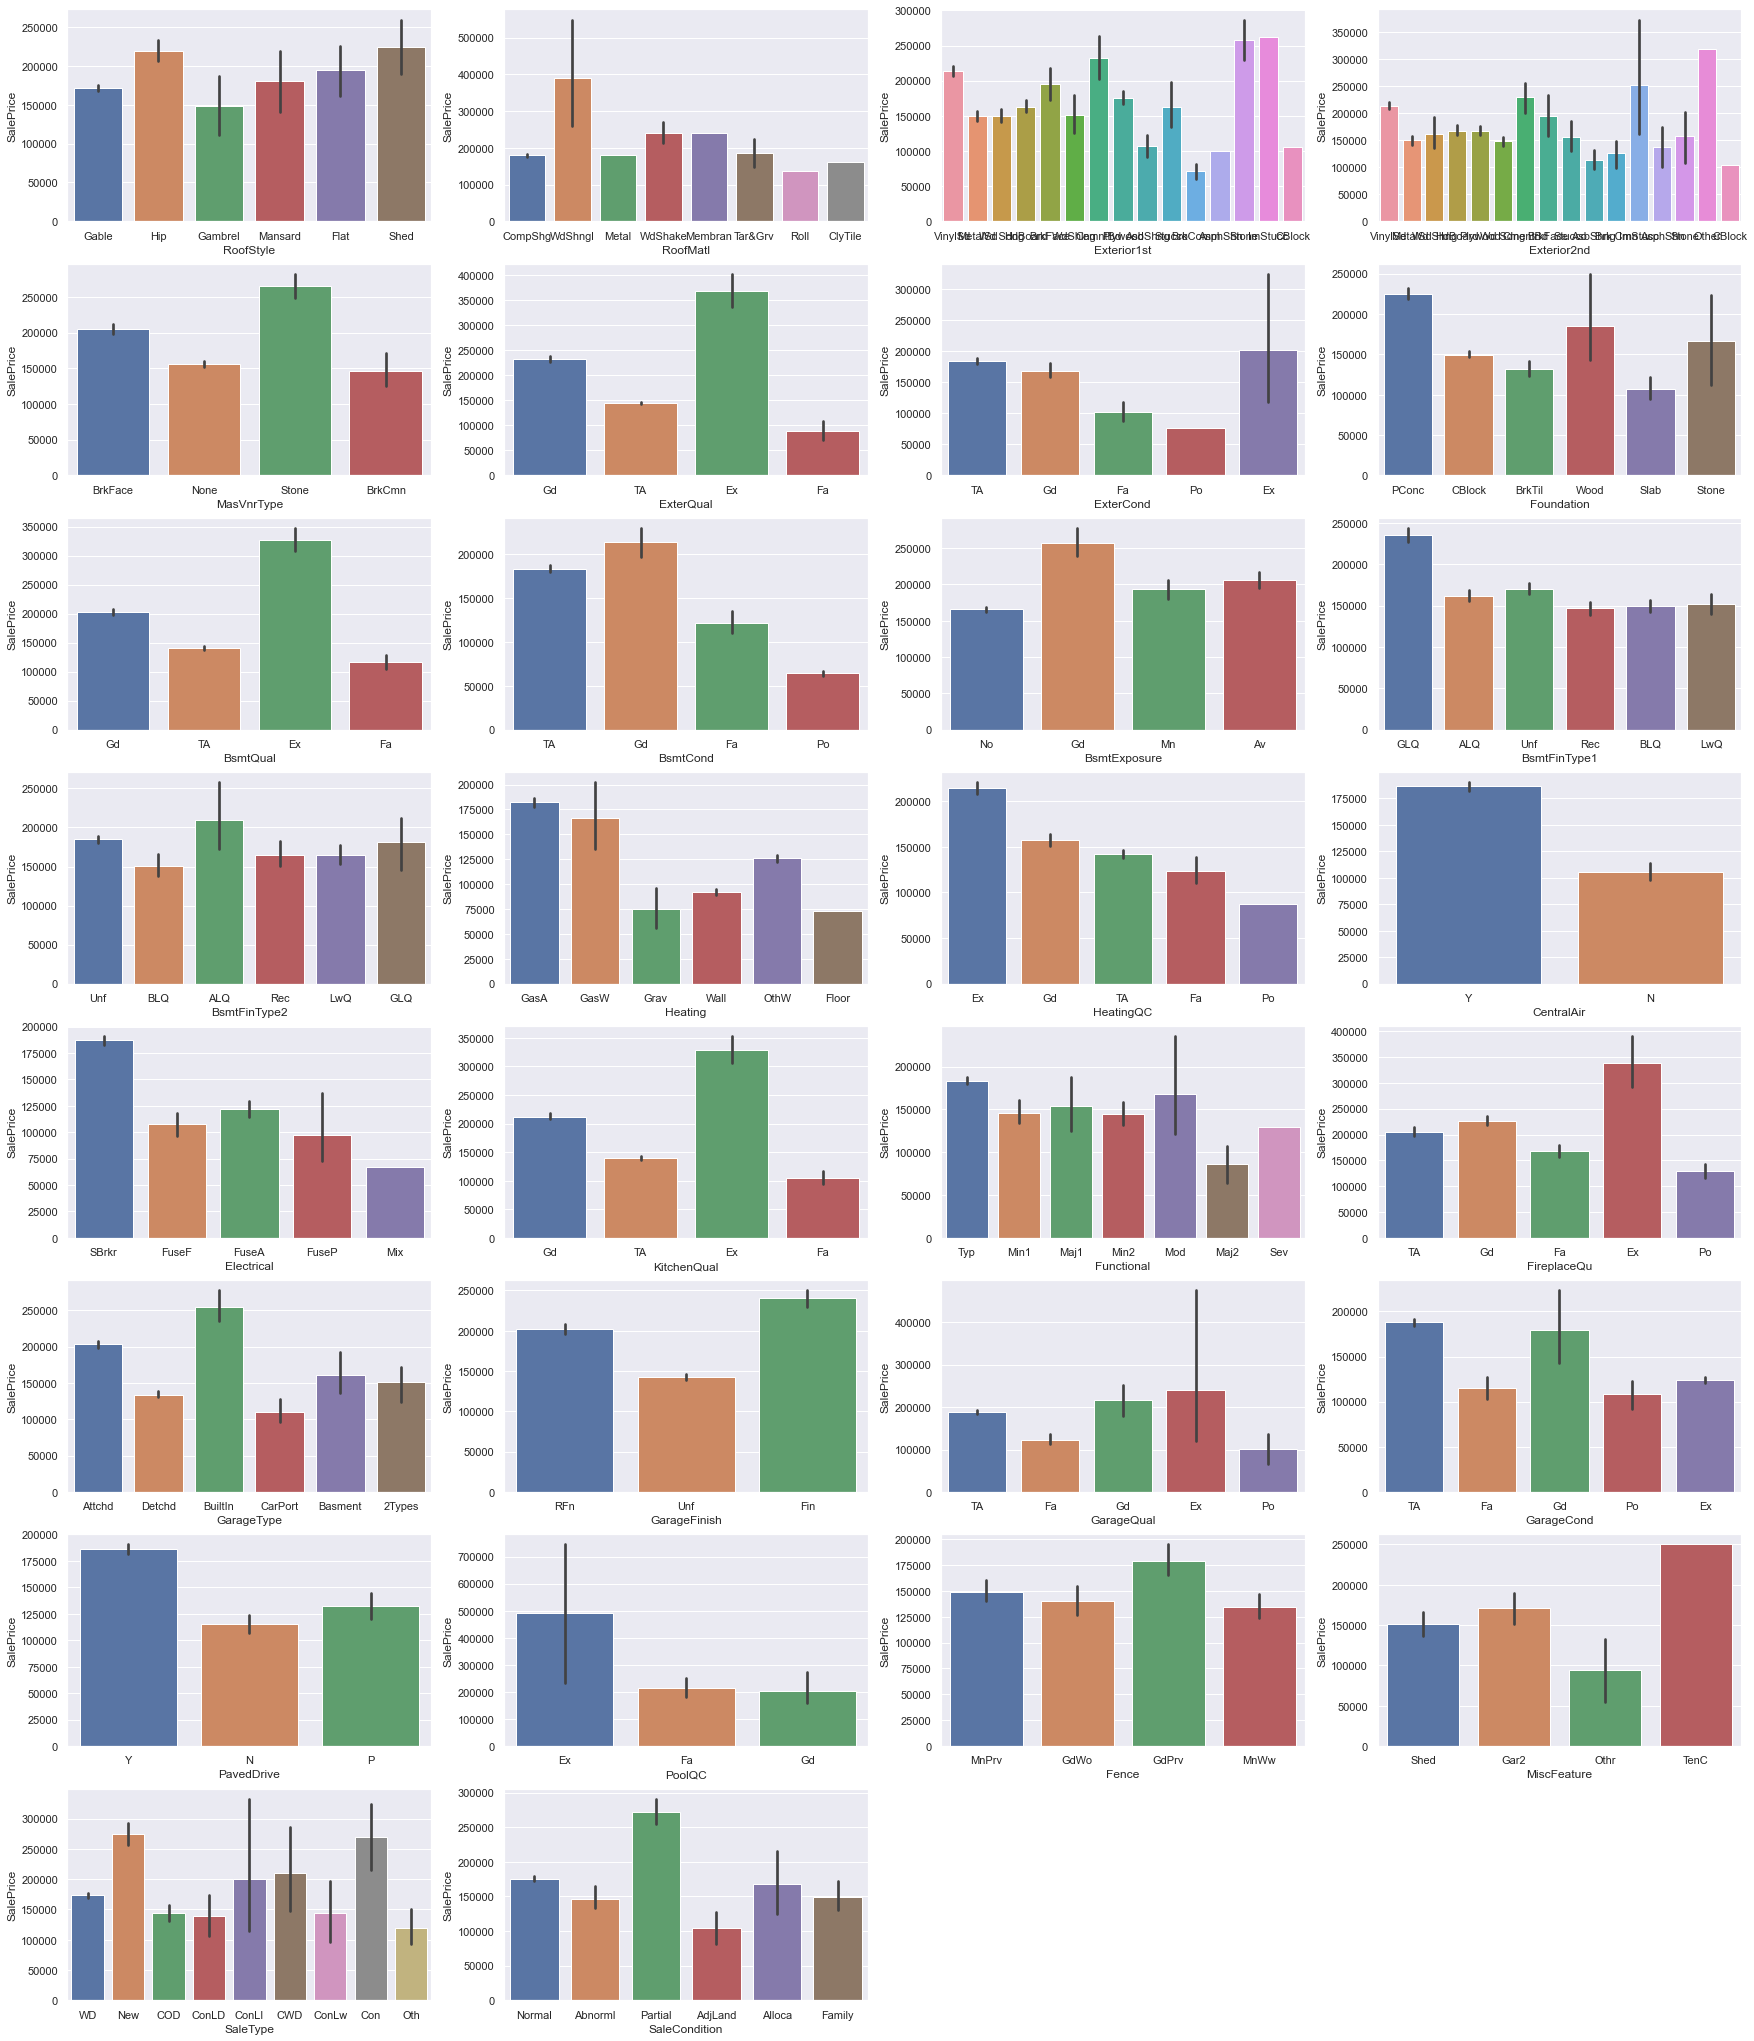

In [82]:

plt.figure(figsize= (30,60))
for i,col in enumerate(categorical_columns):
    plt.subplot(13,4,i+1)
    sns.barplot(x=col, y="SalePrice", data=traindata)

# Plot all remaining numerical columns vs saleprice

In [83]:
Numerical_columns=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

In [84]:
len(Numerical_columns)

29

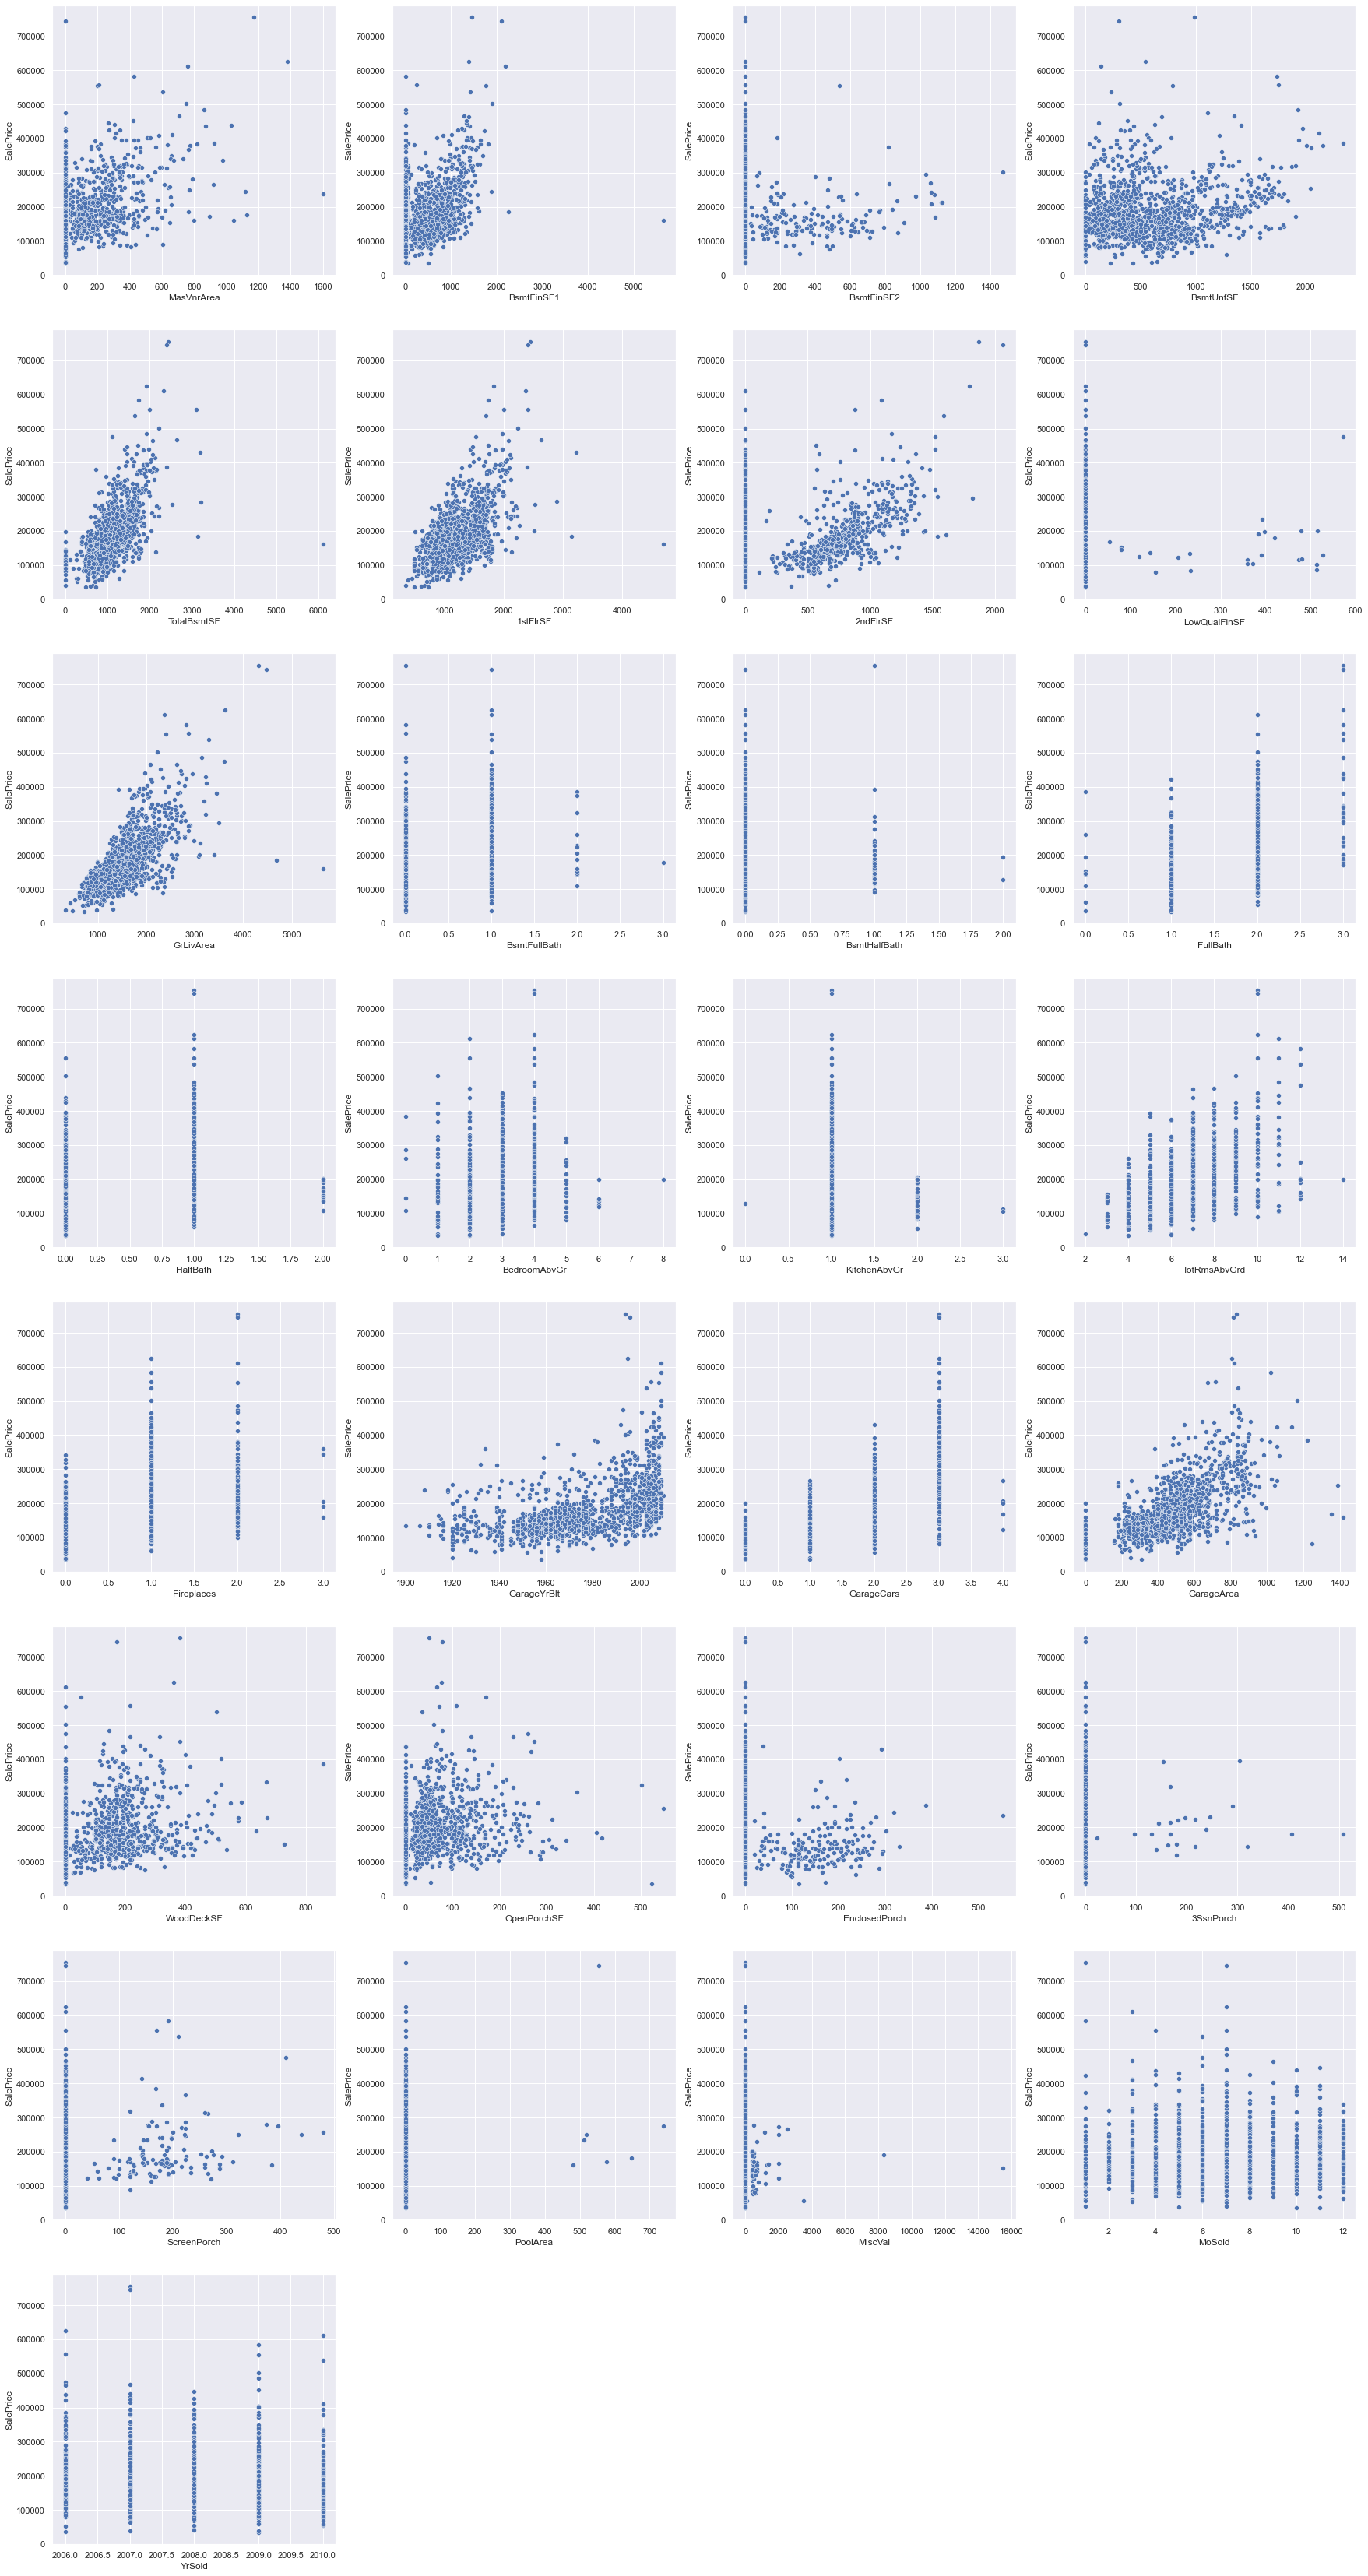

In [85]:
# numerical variables vs SalePrice

plt.figure(figsize= (30,60))
for i,col in enumerate(Numerical_columns):
    plt.subplot(8,4,i+1)
    sns.scatterplot(x=col, y="SalePrice", data=traindata)  

# Preprocessing

In [86]:
all_categorical_columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

In [87]:
def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X
X=Feature_Encoder(traindata,all_categorical_columns)
X=Feature_Encoder(testdata,all_categorical_columns)

In [88]:
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,70.04754,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,70.04754,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,70.04754,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,70.04754,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,70.04754,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [89]:
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,68.580357,11622,1,2,3,3,0,...,120,0,2,2,3,0,6,2010,8,4
1,1462,20,0,68.580357,14267,1,2,0,3,0,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,0,68.580357,13830,1,2,0,3,0,...,0,0,2,2,3,0,3,2010,8,4
3,1464,60,0,68.580357,9978,1,2,0,3,0,...,0,0,2,4,3,0,6,2010,8,4
4,1465,120,0,68.580357,5005,1,2,0,1,0,...,144,0,2,4,3,0,1,2010,8,4


# Feature Scaling

In [90]:
traindata=np.log(traindata)

In [91]:
testdata=np.log(testdata)

# Feature Selection

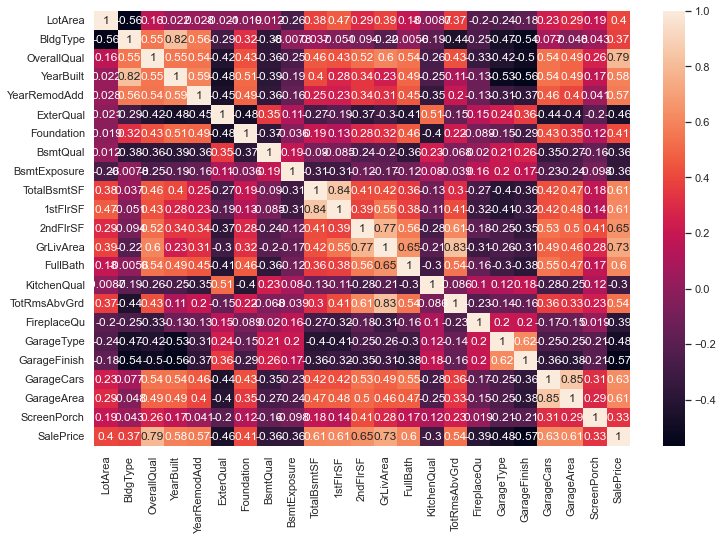

In [223]:
corr = traindata.corr()
top_feature = corr.index[abs(corr['SalePrice'])>0.3]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = traindata[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# top_feature

In [353]:
top_feature=['OverallCond','CentralAir','LotArea','BldgType','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual','Foundation','BsmtQual','BsmtExposure','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','FireplaceQu','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageType','ScreenPorch',]


In [354]:
traindata["BsmtHalfBath"].isnull().sum()

0

In [355]:
testdata["BsmtHalfBath"].isnull().sum()

0

### FILL Null value using mean

In [356]:
testdata['TotalBsmtSF']=testdata['TotalBsmtSF'].fillna(testdata['TotalBsmtSF']).mean()
traindata['GarageYrBlt']=testdata['GarageYrBlt'].fillna(testdata['GarageYrBlt']).mean()
testdata['GarageYrBlt']=testdata['GarageYrBlt'].fillna(testdata['GarageYrBlt']).mean()
testdata['GarageCars']=testdata['GarageCars'].fillna(testdata['GarageCars']).mean()
testdata['GarageArea']=testdata['GarageArea'].fillna(testdata['GarageArea']).mean()
traindata['MasVnrArea']=testdata['MasVnrArea'].fillna(testdata['MasVnrArea']).mean()
testdata['MasVnrArea']=testdata['MasVnrArea'].fillna(testdata['MasVnrArea']).mean()
testdata['BsmtFinSF1']=testdata['BsmtFinSF1'].fillna(testdata['BsmtFinSF1']).mean()
testdata['BsmtHalfBath']=testdata['BsmtHalfBath'].fillna(testdata['BsmtHalfBath']).mean()


# Modeling

In [357]:
x=traindata[top_feature]
y=traindata.SalePrice
test_x=testdata[top_feature]

In [358]:
from numpy import inf
x[x==-inf]=0
test_x[test_x==-inf]=0

C:\Users\moham\AppData\Local\Temp/ipykernel_12920/897907109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x==-inf]=0
C:\Users\moham\anaconda3\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
C:\Users\moham\AppData\Local\Temp/ipykernel_12920/897907109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

### perdiction using Training Data

In [359]:
RF_model=RandomForestRegressor(random_state=1)
RF_model.fit(x,y)
RF_prediction=RF_model.predict(x)
mean_squared_error(RF_prediction,y)

0.00302536656253018

In [360]:
r2_score(RF_prediction,y)

0.9790198517017936

### perdiction using test data using Random Forest

In [361]:
RF_model=RandomForestRegressor(random_state=1)
RF_model.fit(x,y)
RF_predictions=RF_model.predict(test_x)


# perdiction on test data using GradientBoostingRegressor

In [362]:
Gradient_Boosting=GradientBoostingRegressor(learning_rate=0.02,max_depth=5,max_features=8,n_estimators=1700,random_state=0)
Gradient_Boosting.fit(x,y)
GB_Prediction=Gradient_Boosting.predict(test_x)


# Submission

In [363]:
sample_submission['SalePrice']=np.exp(RF_predictions)
sample_submission.to_csv('submission.csv',index=False)
display(sample_submission)

,Id,SalePrice
0,1461,105708.339334
1,1462,119169.371018
2,1463,148898.423767
3,1464,145674.279783
4,1465,169922.735721
...,...,...
1454,2915,82537.045610
1455,2916,78982.019147
1456,2917,124059.250903
1457,2918,100431.121925
